In [1]:
##importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from collections import defaultdict
import stack_clean as t

In [2]:
df = pd.read_csv("./survey_results_public.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Q3 What drives SO satisfaction

In [3]:
##Found answers difference from mean
found_answers = (df.groupby(['StackOverflowFoundAnswer'])[['StackOverflowSatisfaction']].mean()-df.StackOverflowSatisfaction.mean()).reset_index(drop=False)


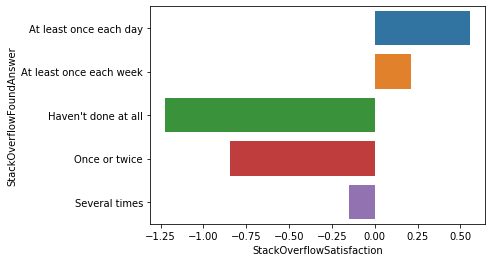

In [4]:
##Plot
sns.barplot(x='StackOverflowSatisfaction', y='StackOverflowFoundAnswer', data=found_answers)

Users who find their answers are more satisfied?
Is more satisfied group finding answers more often?

In [7]:
possible_vals = ["Web developer", "Desktop applications developer", 
                 "None of these", "Mobile developer", "Desktop applications developer	",
                 "Data scientist", "Other", "DevOps specialist",
                 "Database administrator", "Embedded applications/devices developer",
                 "Graphic designer", "Other"
                ]

In [8]:
devtype_fa = t.clean_df(df,col1="DeveloperType",col2="StackOverflowFoundAnswer",look_for=possible_vals)
devtype_fa.head()

Let's group users who found answers frequently

In [10]:
##apply function
devtype_fa["FrequentlyFoundAnswer"] = devtype_fa.apply(t.frequency, axis=1)

In [11]:


devtype_fa_plot = ((((devtype_fa.groupby(["DeveloperType"]).apply(lambda x: x['FrequentlyFoundAnswer'].sum()/x['FrequentlyFoundAnswer'].count()))-(devtype_fa.FrequentlyFoundAnswer.sum()/devtype_fa.FrequentlyFoundAnswer.count())).to_frame(name='FrequentlyFoundAnswers')).reset_index(drop=False))



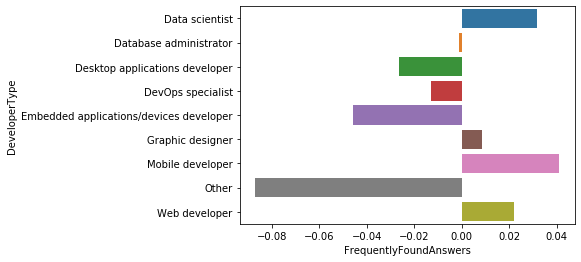

In [12]:
##Plot

sns.barplot(x='FrequentlyFoundAnswers', y='DeveloperType', data=devtype_fa_plot)